# Notes


    
    
    



### Problem

    Classifying Monkey species from images https://www.kaggle.com/slothkong/10-monkey-species

### Dataset 
    
    From [Kaggle](https://www.kaggle.com/slothkong/10-monkey-species/data)

### Algorithms and Models

    Convolutional Neural Network 
    
    Info and images: http://cs231n.github.io/convolutional-networks/
    
#### Why NN?
    Industry standard for image recognition
    
#### Why CNN over NN?
    Regular FC NN don't scale well to images - too many weights and too connected - leads to over fitting and long compute times. Instead of connecting densely like a NN, a CNN layer only connects the neurons in a layer to a small region of the layer before it. Also allows for reducing the image to a single vector in the end.

#### What is a Convolutional layer?
    A convolutional layer is a 3D layer (vs a 1D layer in a dense) where the depth of the layer is the number of learnable filters. A filter is a set of weights inna 3d matrix that transveres over the input image. Each filter is small spatially (width and height wise), but extend the depth of the input (so 3 for our case). A typical filter may be [5x5x3] - 5 pixels wide and high, 3 deep. During the forward pass, we slide(convolve) each filter across the width and height of the input and compute dot products between the filter and the input.

#### What do these filters do?
    As we slide these filters across the input image, we build a 2d activation map that gives the responses of that specific filter at each point in the image. What this means is that the filters scan the input for "features" like edges or areas of high contrast, and the filter will be "activated" when it passes its "feature" on the input image. We can see where in the image a feature was found by seeing where on the the 2d activation map is activated for the filter that is detecting that feature. Convolutional layers deeper in the architecture might be able to detect more complex attributes in the image like patterns, small objects(eyes, wheels), etc.

#### How big is the volume of a Convolutional layer (Height,Width,Depth) given INPUT_SIZE(W), FILTER_SIZE(F), NUM_OF_FILTERS, STRIDE(S), PADDING(P):
      **Padding** - It is a HYPERPARAMATER. Pad the input volume with zeros around the border. Generally used to control the spacial size of the output volumes, usually to match size size of the input volume.
      **Stride** - It is a HYPERPARAMATER. amount of pixels we shift each filter by when scanning. Stride of 1 means we move filters one pixel 
        at a time. Larger strides lead to a smaller output volume in the layer
      **Depth** - It is a HYPERPARAMATER. It corresponds to the number of filters we want to use. Each filter looks for 
        something different in input. 
    **Volume** = (W−F+2P)/S+1 
    Our CNN has an input of 100x100, filter of 3x3, no padding, stride of 1, 110 number of filters. (100-3) + 1 = 98, so the output layer contains 98x98x110 neurons.

#### What does this mean for our Convolutional layer?
    Each neuron from the [98x98x110] output volume is attached to a [3x3x3] filter in the input volume. All the neurons in the same area in the depth column (so 110 of them) actually map to the exact same filter on the input, but each should have different numerical outputs since each filter is looking for a different feature.
    
    With [98x98x110] neurons in this Convolutional layer, each neuron with [3x3x3] weighs and 1 bias. This means that this layer has 29,580,320 paramaters.

### What we set out to do

    Trying to use the simplest CNN possible - From here we can mess with the kernel and see if kernel size helps 
    with fine tuned classification
    *Hypothesis*: smaller kernel sizes will lead to higher accuracies of classification in fined-tuned image classification
    *Independent Variables*: kernel size
    *Constant Variables*: number of layers, types of layers, input shape, epoches
    *Dependent Variables*: Accuracy
    *Limitations*: we are foregoing pure accuracy for experimental reasons - we could get higher accuracy if we tried but we're keeping things constant for consistancy between models
    
    Later we will try to increase accuracy by using better models / playing with the data

#### Our first model

    Simple CNN with just the basic layers:
    1. Convolutions (2D) layer - 
    2. Pooling layer (Max Pooling) - 
    3. Flatten layer -
    4. Fully Connected / Output layer -
    
 

In [ ]:
test_kernel = (2,2)
num_filters = 110
input_shape=(100,100,3)

simple_model = Sequential()
simple_model.add(Conv2D(num_filters, test_kernel, input_shape=input_shape))
simple_model.add(Activation('relu'))
simple_model.add(MaxPooling2D(pool_size=(2,2)))
simple_model.add(Dense(10, activation='softmax'))
model.summary()

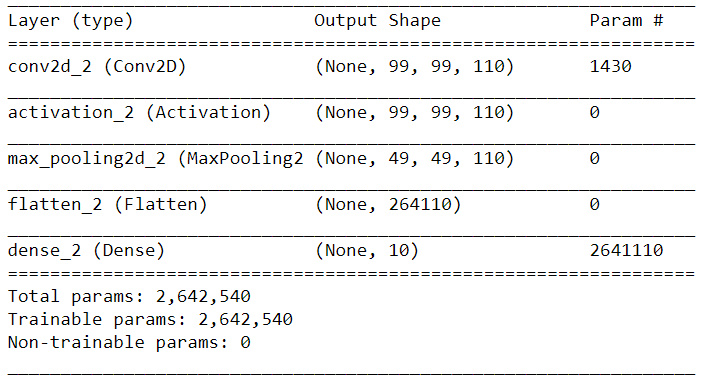
Conv2D - Our convolutional layer  
&nbsp;&nbsp;&nbsp;&nbsp;num_filters: The number of convolutional neurons. Each neuron performs a different convolution on the input  
&nbsp;&nbsp;&nbsp;&nbsp;test_kernal (2,2): The size of each filter i.e. how many pixels to use  
&nbsp;&nbsp;&nbsp;&nbsp;input_shape: The shape of our input (100, 100, 3)   

&nbsp;&nbsp;&nbsp;&nbsp;Gives us 110 100x100x3 weights

Activation - Which activation function to use. relu = max(0,x)  

MaxPooling2D - Perform a downsampling operation along the psatial dimentions (width, height) resulting in a smaller volume  

Dense -  Fully connected layer.   
&nbsp;&nbsp;&nbsp;&nbsp;Compute class scores, resulting in a volume size of [1x1x10], where each of the 10 numbers represents a class  
&nbsp;&nbsp;&nbsp;&nbsp;activation: softmax = extension of sigmoid for multiclass = Pr(Yi=k) = e^(βk⋅Xi) /  ∑0≤c≤K e^(βc⋅Xi)







In [ ]:
simple_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = simple_model.fit(TRAIN_IMG, TRAIN_CLS, batch_size=32, epochs=EPOCHS, verbose=1, validation_split=0.2, shuffle=True)


simple_model.compile - Compile the model so we can use it.  
&nbsp;&nbsp;&nbsp;&nbsp;loss: A loss function to minimize when training [Cross Entropy](https://en.wikipedia.org/wiki/Cross_entropy)  
&nbsp;&nbsp;&nbsp;&nbsp;optimizer: An optimizing function to use. [adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)  
&nbsp;&nbsp;&nbsp;&nbsp;metrics: For us to judge the model's performance
    
simple_model.fit -  Run the model on our data  
&nbsp;&nbsp;&nbsp;&nbsp;TRAIN_IMG: The images to train on  
&nbsp;&nbsp;&nbsp;&nbsp;TRAIN_CLS: The classes for those images  
&nbsp;&nbsp;&nbsp;&nbsp;batch_size: How many images to train at once  
&nbsp;&nbsp;&nbsp;&nbsp;epochs: How many iterations  
&nbsp;&nbsp;&nbsp;&nbsp;validation_split: Set aside data for validation  
&nbsp;&nbsp;&nbsp;&nbsp;shuffle: Shuffle the data between epochs  

#### Shitty Results

Different kernel sizes, image dimensions

graphs, etc.

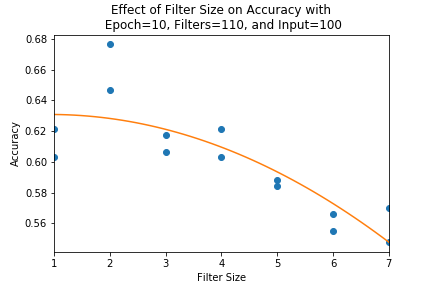
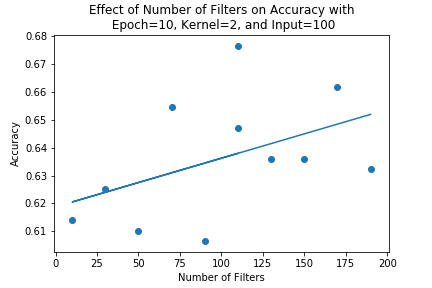
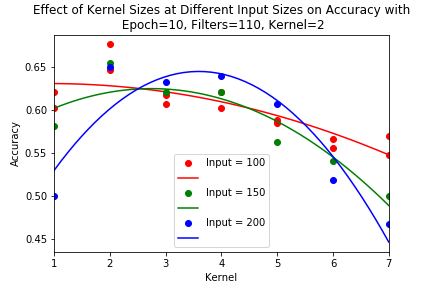
### Overfitting Data, Accuracy Cap in 60-70%
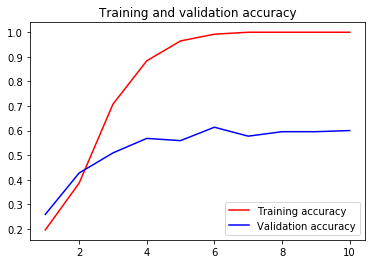
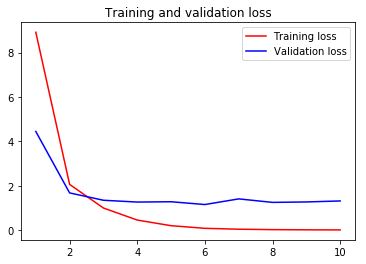


### Getting Better Accuracy(?)

We were overfitting every model we tried very quickly => Not enough data  
Model is too simple, cannot handle such fine-grain classification.  

#### Proposed Solutions: 
Use ImageDataGenerator to give us more data + use better suited model

TRAIN_DATAGEN = ImageDataGenerator(rescale=1./255,
                                   rotation_range=25, 
                                   horizontal_flip=True, 
                                   zoom_range=0.1, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   fill_mode='nearest'
                                  ) 
                                  
rescale: Change pixels from 0 - 255 to 0 - 1
rotation_range: How many degrees to use for random rotations    
horizontal_flip: Randomly flip images horizontaly  
zoom_range: Range for random zoom  
width_shift_range, height_shift_range: Randomly shift pixel range  
fill_mode: How to fill empty pixels when shifting images 

### Didn't help
    Even with data generation, inc epoches, inc conv layers,dropout layers - still cap in same range
    
#### Why?
    Limited data set - too small for fine tuned classification
    Model not generalized enough
    
### Let's Change gears - How can we make the model more generalizable without more data?
    Used a pretrained model, add new layers and train
